<a href="https://colab.research.google.com/github/shtomar-adb/ML-Android/blob/main/Simple_Equation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### The Goal is to train a ML model for finding y in equation y = 2x - 1
#### We will create s sample array of X values and sample array of y values


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from google.colab import drive
import tensorflow as tf


In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#Generating the input
xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0, 9.0], dtype=float)

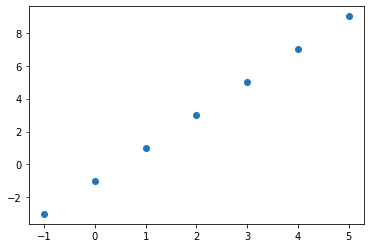

In [ ]:
plt.scatter(xs, ys)
plt.show()

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(units=1, input_shape=[1])
])

In [ ]:
model.compile(optimizer="sgd", loss="mean_squared_error")

In [ ]:
history = model.fit(xs, ys, epochs=500, verbose=False)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history.history.keys()

dict_keys(['loss'])

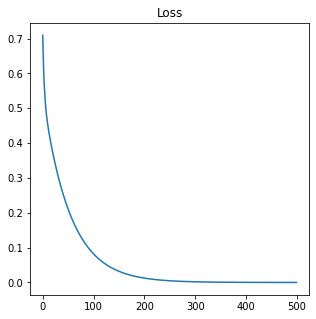

In [ ]:
plt.figure(figsize=(5,5))
plt.plot(history.history['loss'], label = "Training Loss")
plt.title('Loss')
plt.show()

In [ ]:
# Predict the output for input value 10
result = model.predict([10.0])

In [ ]:
print(result)

[[18.984564]]


In [ ]:
#The value of y using the model for input 10 is 18.978613. Now calculate the value of y by putting 10 in the equation y = 2x - 1
y = (2 * 10) - 1
print(y)

19


In [ ]:
#Save the model
model.save("/content/gdrive/MyDrive/equation_model/")

In [ ]:
#Converting to tflite
converter = tf.lite.TFLiteConverter.from_saved_model("/content/gdrive/MyDrive/equation_model/")
tflite_model = converter.convert()

In [ ]:
with open("/content/gdrive/MyDrive/equation_model/lite/equation.tflite", "wb") as f:
  f.write(tflite_model)